### Formula

Strength of Magnetic Field
$H=\dfrac{I\times N}{L}$

Ampere Force
$F=BIL$

B:Magnetic Induction

I:Current

L:length of coil

Magnetic Induction
$B=\dfrac{\mu _{0}I}{2r}$

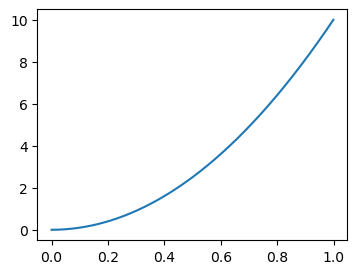

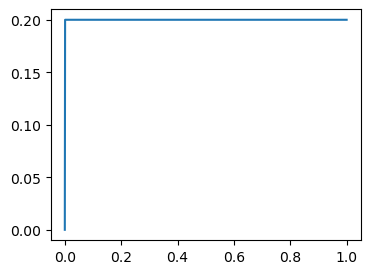

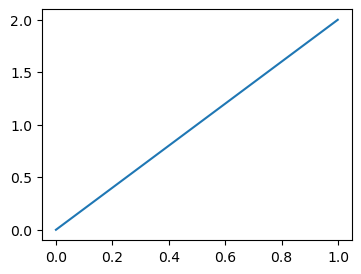

Time: 1.0000000000000007s


In [3]:
import numpy as np

class Object:
    def __init__(self):
        self.mass = 10 #kg
        self.volume = 10 #m^3
        self.density = self.mass / self.volume
        self.velocity = 0 #m/s
        self.acc = 0 #m/s^2
        self.position = 0 #m
        self.dt = 0.01 #s
    
    def update_object(self,mass=1,volume=1):
        self.mass = mass
        self.volume = volume
        self.density = self.mass / self.volume
        
    def update_acc(self,ampere_force,mass):
        self.acc = ampere_force / self.mass
    
    def get_acc(self):
        return self.acc
    
    def update_velocity(self,acc):
        self.velocity += self.acc * self.dt
    
    def get_velocity(self):
        return self.velocity
    
    def update_position(self,velocity):
        self.position += self.velocity * self.dt
    
    def get_position(self):
        return self.position
        
        
class Coil:
    def __init__(self):
        self.turn = 200
        self.length = 10 #m
        self.ampere = 1000 #A #Current
        self.radius = 1 #m
    def modify_coil(self,turn=100,length=1,radius=1):
        self.turn = turn
        self.length = length
        self.radius = radius
    
    def get_turns(self):
        return self.turn
    
    def get_ampere(self):
        return self.ampere
    
    def get_length(self):
        return self.length
    
    def get_turns(self):
        return self.turn
    
    def get_radius(self):
        return self.radius


class simulation:
    def __init__(self):
        self.mu = 4 * np.pi * 10**-7 #H/m
        self.dt = 0.001 #s
        
    def update_current(self, ampere=1):
        self.ampere = ampere
    
    def get_magnetic_induction(self,ampere,radius):
        self.B = (self.mu * ampere) / (2 * np.pi * radius)
        return self.B
    
    def get_ampere_force(self,B,ampere,length):
        self.ampere_force = self.B * ampere * length
        return self.ampere_force
    
  
def run():
    sim = simulation()
    coil = Coil()
    object = Object()
    
    #DATA COLLECTION
    posi = []
    MI_DATA = []
    AF_DATA = []
    VEL_DATA = []
    ACC_DATA = []
    time = 0
    
    pos = object.get_position()
    vel = object.get_velocity()
    acc = object.get_acc()
    
    turns = coil.get_turns()
    length = coil.get_length()
    ampere = coil.get_ampere()
    radius = coil.get_radius()
    
    while pos < length:
        
        posi.append(pos)
        ACC_DATA.append(acc)
        VEL_DATA.append(vel)
        
        MI = sim.get_magnetic_induction(ampere,radius)
        AF = sim.get_ampere_force(MI,ampere,length)
        
        object.update_acc(AF,object.mass)
        acc = object.get_acc()
        object.update_velocity(acc)
        vel = object.get_velocity()
        object.update_position(vel)
        pos = object.get_position()
        
        time += sim.dt
    
    x = np.arange(0,time-sim.dt,sim.dt)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(4,3))
    plt.plot(x,posi)
    plt.show()
    plt.figure(figsize=(4,3))
    plt.plot(x,ACC_DATA)
    plt.show()
    plt.figure(figsize=(4,3))
    plt.plot(x,VEL_DATA)
    plt.show()
    print(f"Time: {time}s")
run()